In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv('douban.csv', encoding='utf-8')

In [44]:
num = data['评分'].value_counts()

Text(0.5, 1.0, '《流浪地球》豆瓣短评评分分数分布')

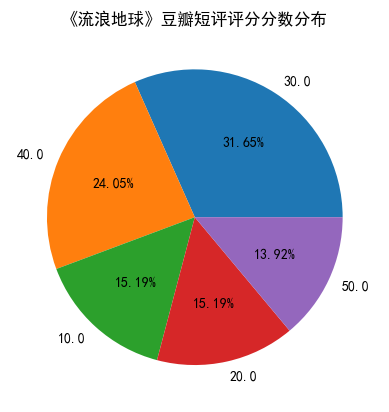

In [45]:
plt.rcParams['font.family'] = ['SimHei']
plt.pie(num, labels=num.index, autopct='%.2f%%')
plt.title('《流浪地球》豆瓣短评评分分数分布')


In [46]:
num = data['发表时间'].apply(lambda x:x.split(' ')[0]).value_counts()
num=num.sort_index()

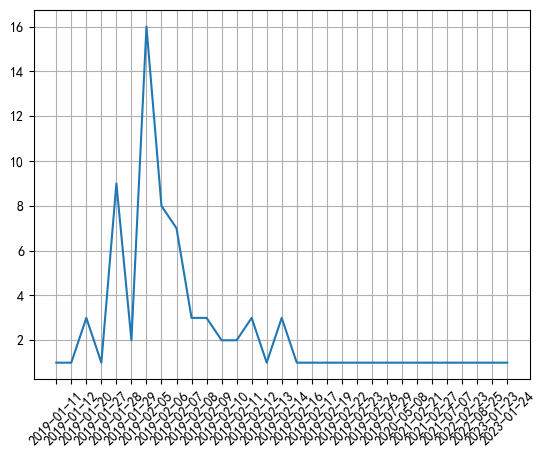

In [47]:
plt.plot(range (len(num)),num)
plt.xticks(range(len(num)), num.index, rotation=45)
plt.grid()


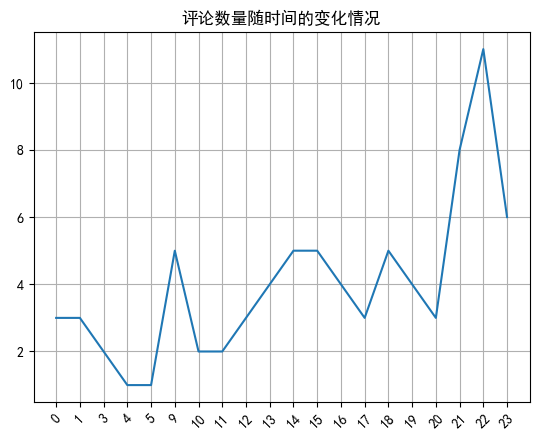

In [48]:
num = pd.to_datetime(data['发表时间']).apply(lambda x: x.hour).value_counts()
num = num.sort_index()
plt.plot(range(len(num)), num)
plt.xticks(range(len(num)), num.index)
plt.title('评论数量随时间的变化情况')
plt.grid()


In [55]:
data.loc[:, ['发表时间','评分']]
data['发表时间'] = data['发表时间'].apply(lambda x : x.split(' ')[0])

In [56]:
tmp = pd.DataFrame(0, 
                   index=data['发表时间'].drop_duplicates().sort_values(),
                   columns=data['评分'].drop_duplicates().sort_values())


In [58]:
data.loc[:,['发表时间','评分']]

,发表时间,评分
0,2019-01-29,30.0
1,2019-02-06,10.0
2,2019-02-09,NaN
3,2019-02-14,40.0
4,2021-02-27,10.0
...,...,...
75,2019-02-12,40.0
76,2019-01-28,50.0
77,2021-02-21,50.0
78,2019-02-06,30.0


In [59]:
for i, j in zip(data['发表时间'], data['评分']):
    tmp.loc[i, j] += 1

tmp = tmp.iloc[:, :-1]


In [61]:
tmp

评分,10.0,20.0,30.0,40.0,50.0
发表时间,,,,,
2019-01-11,0,0,1,0,0
2019-01-12,0,1,0,0,0
2019-01-20,0,0,0,2,1
2019-01-27,0,0,1,0,0
2019-01-28,0,2,0,4,3
2019-01-29,0,0,2,0,0
2019-02-05,2,2,5,3,4
2019-02-06,1,0,4,3,0
2019-02-07,0,1,3,2,1


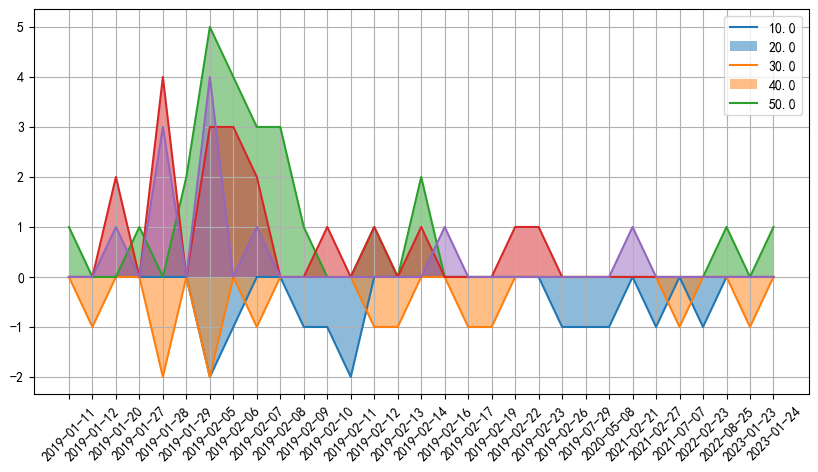

In [63]:
n, m = tmp.shape
plt.figure(figsize=(10, 5))
plt.rcParams['axes.unicode_minus'] = False
for i in range(m):
    plt.plot(range(n), (-1 if i < 2 else 1) * tmp.iloc[:, i])
    plt.fill_between(range(n), (-1 if i < 2 else 1) * tmp.iloc[:, i], alpha=0.5)
plt.legend(tmp.columns)
plt.grid()
plt.xticks(range(n), tmp.index, rotation=45)
plt.show()
